In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#import model
from model import Model_9
import matplotlib.pyplot as plt
import dataset
import train


In [2]:
SEED = 1


cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)


torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

train_data = dataset.train()
test_data = dataset.test()
if cuda:
    batch_size = 128
    shuffle = True
    num_workers = 4
    pin_memory = True
    train_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,train_data)
    test_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,test_data)
else:
    batch_size =64
    shuffle = True
    num_workers =4
    pin_memory = True
    train_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,train_data)
    test_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,test_data)


CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_9().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           4,608
             ReLU-10           [-1, 32, 16, 16]               0
      BatchNorm2d-11           [-1, 32, 16, 16]              64
          Dropout-12           [-1, 32, 16, 16]               0
           Conv2d-13           [-1, 32, 16, 16]           9,216
           Conv2d-14           [-1

In [4]:
from torch.optim.lr_scheduler import StepLR
model = Model_9().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)
scheduler = StepLR(optimizer, step_size=25, gamma=0.08)
num_epochs = 50

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = train.train(model, device, train_loader, optimizer)
    scheduler.step()
    test_acc, test_losses = train.test(model, device, test_loader)
    


Epoch 1


Loss=1.6833547353744507 Batch_id=390 Accuracy=37.21: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s]



Test set: Average loss: 1.4682, Accuracy: 4599/10000 (45.99%)

Epoch 2


Loss=1.2563927173614502 Batch_id=390 Accuracy=47.59: 100%|██████████| 391/391 [00:28<00:00, 13.78it/s]



Test set: Average loss: 1.2279, Accuracy: 5611/10000 (56.11%)

Epoch 3


Loss=1.2506223917007446 Batch_id=390 Accuracy=53.15: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]



Test set: Average loss: 1.0900, Accuracy: 6089/10000 (60.89%)

Epoch 4


Loss=0.9924030303955078 Batch_id=390 Accuracy=57.22: 100%|██████████| 391/391 [00:23<00:00, 16.76it/s]



Test set: Average loss: 0.9174, Accuracy: 6696/10000 (66.96%)

Epoch 5


Loss=1.084663987159729 Batch_id=390 Accuracy=60.95: 100%|██████████| 391/391 [00:23<00:00, 16.92it/s] 



Test set: Average loss: 0.8463, Accuracy: 6959/10000 (69.59%)

Epoch 6


Loss=0.8529049158096313 Batch_id=390 Accuracy=63.29: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s]



Test set: Average loss: 0.7882, Accuracy: 7254/10000 (72.54%)

Epoch 7


Loss=0.9087160229682922 Batch_id=390 Accuracy=65.10: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.7761, Accuracy: 7201/10000 (72.01%)

Epoch 8


Loss=0.9944046139717102 Batch_id=390 Accuracy=66.85: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]



Test set: Average loss: 0.7228, Accuracy: 7481/10000 (74.81%)

Epoch 9


Loss=0.9161804914474487 Batch_id=390 Accuracy=68.04: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]



Test set: Average loss: 0.7633, Accuracy: 7370/10000 (73.70%)

Epoch 10


Loss=0.8672530055046082 Batch_id=390 Accuracy=69.08: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]



Test set: Average loss: 0.6863, Accuracy: 7622/10000 (76.22%)

Epoch 11


Loss=0.6806663274765015 Batch_id=390 Accuracy=70.33: 100%|██████████| 391/391 [00:23<00:00, 16.98it/s]



Test set: Average loss: 0.6623, Accuracy: 7682/10000 (76.82%)

Epoch 12


Loss=0.6863409280776978 Batch_id=390 Accuracy=71.00: 100%|██████████| 391/391 [00:22<00:00, 17.01it/s]



Test set: Average loss: 0.6122, Accuracy: 7903/10000 (79.03%)

Epoch 13


Loss=0.7146294713020325 Batch_id=390 Accuracy=71.77: 100%|██████████| 391/391 [00:23<00:00, 16.93it/s]



Test set: Average loss: 0.6282, Accuracy: 7838/10000 (78.38%)

Epoch 14


Loss=1.0293047428131104 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s]



Test set: Average loss: 0.6118, Accuracy: 7856/10000 (78.56%)

Epoch 15


Loss=0.8123503923416138 Batch_id=390 Accuracy=72.87: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s]



Test set: Average loss: 0.5906, Accuracy: 8008/10000 (80.08%)

Epoch 16


Loss=0.8912307024002075 Batch_id=390 Accuracy=73.55: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]



Test set: Average loss: 0.5627, Accuracy: 8017/10000 (80.17%)

Epoch 17


Loss=0.6705540418624878 Batch_id=390 Accuracy=73.65: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]



Test set: Average loss: 0.5719, Accuracy: 8057/10000 (80.57%)

Epoch 18


Loss=0.7654520273208618 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s] 



Test set: Average loss: 0.5420, Accuracy: 8159/10000 (81.59%)

Epoch 19


Loss=0.6481605172157288 Batch_id=390 Accuracy=74.53: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s] 



Test set: Average loss: 0.5591, Accuracy: 8079/10000 (80.79%)

Epoch 20


Loss=0.6777233481407166 Batch_id=390 Accuracy=75.12: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]



Test set: Average loss: 0.5335, Accuracy: 8154/10000 (81.54%)

Epoch 21


Loss=0.8435183763504028 Batch_id=390 Accuracy=75.30: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]



Test set: Average loss: 0.5291, Accuracy: 8171/10000 (81.71%)

Epoch 22


Loss=0.7607002258300781 Batch_id=390 Accuracy=75.57: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]



Test set: Average loss: 0.5265, Accuracy: 8175/10000 (81.75%)

Epoch 23


Loss=0.5706086754798889 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]



Test set: Average loss: 0.5226, Accuracy: 8213/10000 (82.13%)

Epoch 24


Loss=0.615822970867157 Batch_id=390 Accuracy=76.12: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s]  



Test set: Average loss: 0.5006, Accuracy: 8303/10000 (83.03%)

Epoch 25


Loss=0.7299373149871826 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s] 



Test set: Average loss: 0.5119, Accuracy: 8189/10000 (81.89%)

Epoch 26


Loss=0.5831146240234375 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s] 



Test set: Average loss: 0.4618, Accuracy: 8397/10000 (83.97%)

Epoch 27


Loss=0.6924815773963928 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s] 



Test set: Average loss: 0.4553, Accuracy: 8446/10000 (84.46%)

Epoch 28


Loss=0.5744480490684509 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s] 



Test set: Average loss: 0.4508, Accuracy: 8454/10000 (84.54%)

Epoch 29


Loss=0.605919361114502 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]  



Test set: Average loss: 0.4538, Accuracy: 8473/10000 (84.73%)

Epoch 30


Loss=0.3153391182422638 Batch_id=390 Accuracy=79.22: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s] 



Test set: Average loss: 0.4470, Accuracy: 8483/10000 (84.83%)

Epoch 31


Loss=0.6091096997261047 Batch_id=390 Accuracy=79.32: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s] 



Test set: Average loss: 0.4488, Accuracy: 8470/10000 (84.70%)

Epoch 32


Loss=0.5258050560951233 Batch_id=390 Accuracy=79.44: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s] 



Test set: Average loss: 0.4447, Accuracy: 8504/10000 (85.04%)

Epoch 33


Loss=0.541857123374939 Batch_id=390 Accuracy=79.77: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s]  



Test set: Average loss: 0.4437, Accuracy: 8479/10000 (84.79%)

Epoch 34


Loss=0.5674678683280945 Batch_id=390 Accuracy=79.59: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s] 



Test set: Average loss: 0.4446, Accuracy: 8487/10000 (84.87%)

Epoch 35


Loss=0.5964156985282898 Batch_id=390 Accuracy=79.50: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s] 



Test set: Average loss: 0.4436, Accuracy: 8500/10000 (85.00%)

Epoch 36


Loss=0.5441532731056213 Batch_id=390 Accuracy=79.70: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s] 



Test set: Average loss: 0.4425, Accuracy: 8517/10000 (85.17%)

Epoch 37


Loss=0.5046738982200623 Batch_id=390 Accuracy=79.58: 100%|██████████| 391/391 [00:22<00:00, 17.00it/s] 



Test set: Average loss: 0.4388, Accuracy: 8519/10000 (85.19%)

Epoch 38


Loss=0.438842236995697 Batch_id=390 Accuracy=79.75: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]  



Test set: Average loss: 0.4408, Accuracy: 8515/10000 (85.15%)

Epoch 39


Loss=0.6144164800643921 Batch_id=390 Accuracy=79.59: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s] 



Test set: Average loss: 0.4379, Accuracy: 8518/10000 (85.18%)

Epoch 40


Loss=0.5562204122543335 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [00:22<00:00, 17.00it/s] 



Test set: Average loss: 0.4385, Accuracy: 8508/10000 (85.08%)

Epoch 41


Loss=0.6218477487564087 Batch_id=390 Accuracy=80.08: 100%|██████████| 391/391 [00:25<00:00, 15.39it/s] 



Test set: Average loss: 0.4379, Accuracy: 8506/10000 (85.06%)

Epoch 42


Loss=0.560425877571106 Batch_id=390 Accuracy=79.93: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]  



Test set: Average loss: 0.4384, Accuracy: 8518/10000 (85.18%)

Epoch 43


Loss=0.5746508836746216 Batch_id=390 Accuracy=80.05: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s] 



Test set: Average loss: 0.4356, Accuracy: 8518/10000 (85.18%)

Epoch 44


Loss=0.5930072069168091 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s] 



Test set: Average loss: 0.4369, Accuracy: 8510/10000 (85.10%)

Epoch 45


Loss=0.7086218595504761 Batch_id=390 Accuracy=80.45: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s] 



Test set: Average loss: 0.4376, Accuracy: 8501/10000 (85.01%)

Epoch 46


Loss=0.5093702673912048 Batch_id=390 Accuracy=80.12: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s] 



Test set: Average loss: 0.4349, Accuracy: 8541/10000 (85.41%)

Epoch 47


Loss=0.6346791386604309 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s] 



Test set: Average loss: 0.4343, Accuracy: 8515/10000 (85.15%)

Epoch 48


Loss=0.4864988923072815 Batch_id=390 Accuracy=80.03: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s] 



Test set: Average loss: 0.4320, Accuracy: 8524/10000 (85.24%)

Epoch 49


Loss=0.5268091559410095 Batch_id=390 Accuracy=80.22: 100%|██████████| 391/391 [00:22<00:00, 17.03it/s] 



Test set: Average loss: 0.4320, Accuracy: 8535/10000 (85.35%)

Epoch 50


Loss=0.6531031131744385 Batch_id=390 Accuracy=80.44: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s] 



Test set: Average loss: 0.4342, Accuracy: 8516/10000 (85.16%)



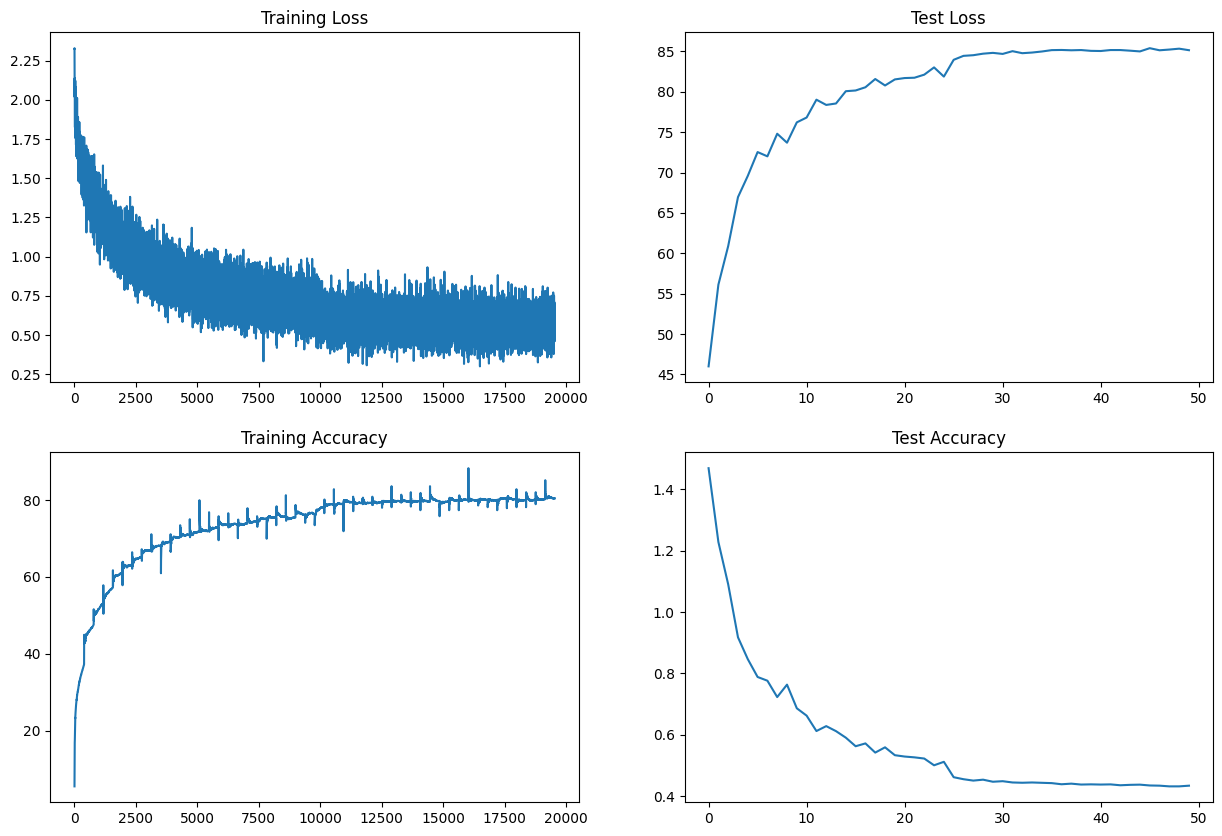

In [5]:
train.plot_loss_accuracy(train_losses,train_acc,test_losses,test_acc)